In [14]:
# first import the POMDPs.jl interface
using POMDPs
# POMDPModelTools has tools that help build the MDP definition
using POMDPModelTools
# POMDPPolicies provides functions to help define simple policies
using POMDPPolicies
# POMDPSimulators provide functions for running MDP simulations
using POMDPSimulators
# POMDP and MPD generators 
using POMDPModels: TabularMDP
using POMDPTools
using Plots

In [2]:
function index_to_action(x, desired_length=8)
    digits = [parse(Int, i) for i in string(x-1, base=2)]
    n_to_pad = desired_length - length(digits)
    return [zeros(n_to_pad); digits]
end

function action_to_index(x)
    return parse(Int, join(string.(x), ""), base=2) + 1
end
sigmoid(x) = 1 /(1 + exp(-x))


sigmoid (generic function with 1 method)

In [3]:
# Define the tables and return a tabular POMDP
function SimpleMigraineMDP(;state_coeff = 1.0, action_coeffs = [1.0, 2.0], shift = 0.0, discount_factor = 0.95)
    n_actions = 2^length(action_coeffs)
    
    # T[sp, a, s]
    T = zeros(2, n_actions, 2)

    for a = 1:n_actions
        for s = 0:1
            a_binary = index_to_action(a, length(action_coeffs))
            T[2, a, s+1] = sigmoid(state_coeff * s + a_binary' * action_coeffs + shift)
            T[1, a, s+1] = 1 - T[2, a, s+1]
        end
    end

    # R[s, a]
    R = zeros(2, n_actions)
    return TabularMDP(T, R, discount_factor)
end

mdp = SimpleMigraineMDP()


TabularMDP([0.5 0.11920292202211769 0.2689414213699951 0.047425873177566635; 0.5 0.8807970779778823 0.7310585786300049 0.9525741268224334;;; 0.2689414213699951 0.047425873177566635 0.11920292202211769 0.01798620996209155; 0.7310585786300049 0.9525741268224334 0.8807970779778823 0.9820137900379085], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], 0.95)

In [11]:
# for (s, a, r) in stepthrough(mdp, FunctionPolicy(s->action_to_index([0, 0])), "s,a,r", max_steps=10)
#     @show s, a, r
# end
no_trigger_policy = FunctionPolicy(s->action_to_index([0, 0]))
trigger_one_policy = FunctionPolicy(s->action_to_index([0, 1]))
trigger_two_policy = FunctionPolicy(s->action_to_index([1, 0]))
trigger_both_policy = FunctionPolicy(s->action_to_index([1, 1]))

hr = HistoryRecorder(max_steps=20)
history = simulate(hr, mdp, no_trigger_policy)
states_notrigger
for (s, a, sp) in eachstep(history, "s,a,sp")
    push!(states, s)
end 


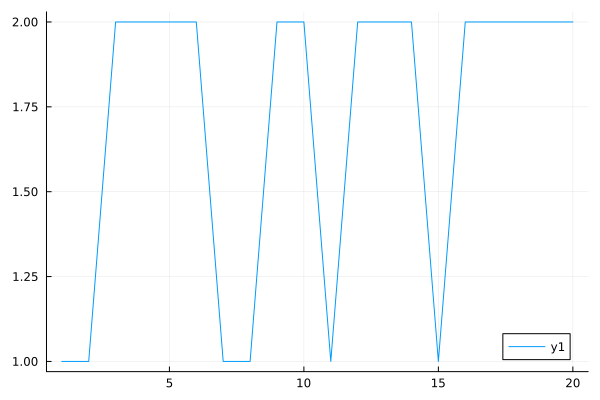

In [15]:
plot(states, label="no triggers")